# Examples

Some examples of how to use the anomaly agent.

<a target="_blank" href="https://colab.research.google.com/github/andrewm4894/anomaly-agent/blob/main/notebooks/examples.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
from IPython.display import Image, display
import pandas as pd
from anomaly_agent.utils import make_df, make_anomaly_config
from anomaly_agent.plot import plot_df_matplotlib as plot_df
from anomaly_agent import AnomalyAgent

pd.set_option("display.max_colwidth", None)

# set openai api key if not in environment
# os.environ['OPENAI_API_KEY'] = "<your-openai-api-key>"

In [2]:
# get and anomaly config to generate some dummy data
anomaly_cfg = make_anomaly_config()
print(anomaly_cfg)

# generate some dummy data
df = make_df(1000, 3, anomaly_config=anomaly_cfg)
df.head()

{'enabled': True, 'fraction': 0.02, 'methods': ['spike', 'drop', 'shift', 'noise'], 'spike_factor': 10, 'shift_value': 3, 'noise_std': 0.2}


,timestamp,var1,var2,var3
0,2020-01-01,0.328446,0.903012,0.083836
1,2020-01-02,0.294358,0.924188,0.568587
2,2020-01-03,0.738481,0.890967,0.743621
3,2020-01-04,0.950052,0.160089,0.910734
4,2020-01-05,0.625183,0.230779,0.535461


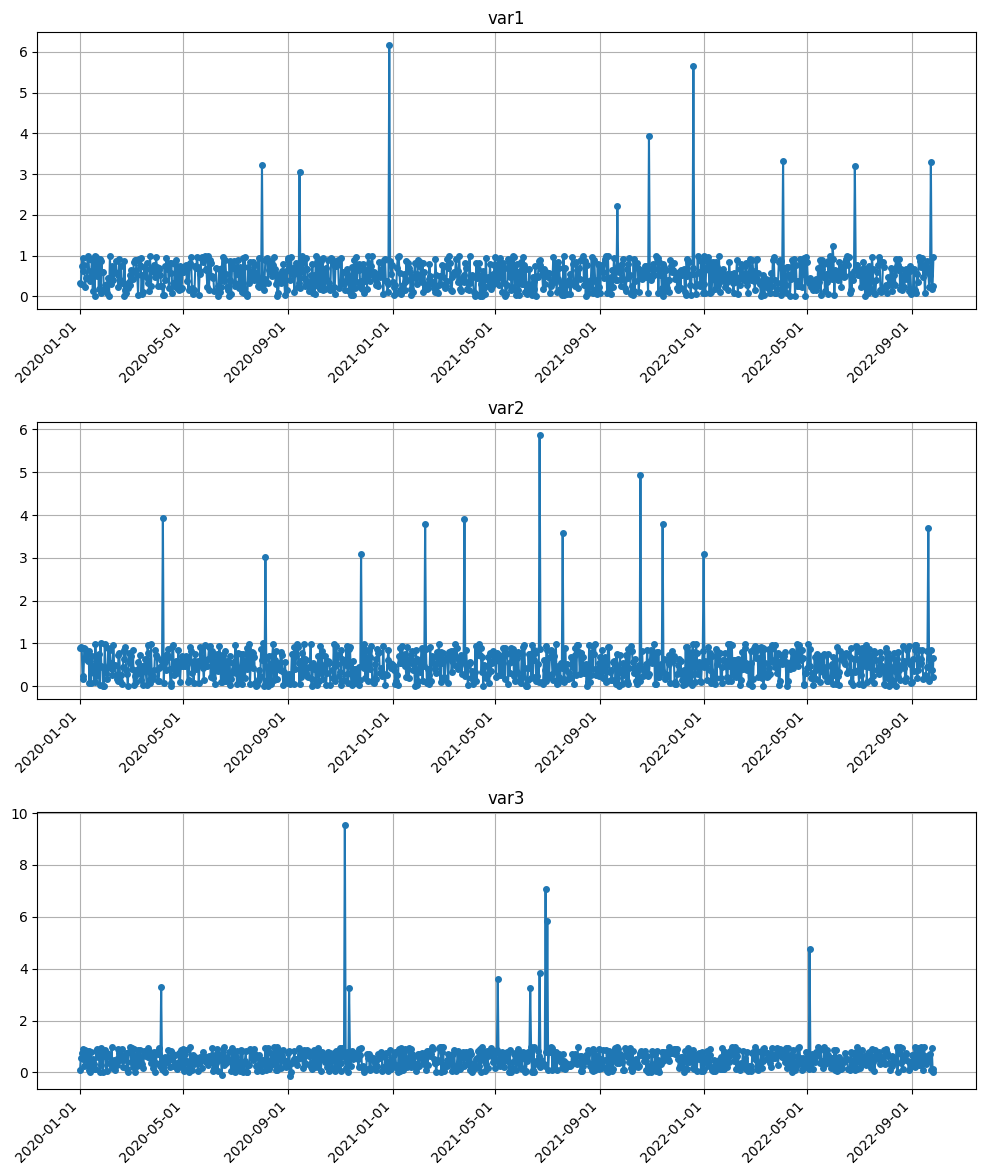

In [3]:
# plot the data
plot_df(df)

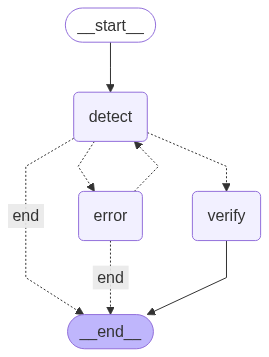

In [4]:
# create anomaly agent
anomaly_agent = AnomalyAgent(debug=True)

# Display the graph in Mermaid format
display(Image(anomaly_agent.app.get_graph().draw_mermaid_png()))

In [5]:
# detect anomalies
anomalies = anomaly_agent.detect_anomalies(df, parallel=True)

# print anomalies
print(anomalies)

2025-08-17 23:21:09,203 - anomaly_agent.nodes.DetectionNode - DEBUG - DetectionNode: Processing var1
2025-08-17 23:21:09,205 - anomaly_agent.nodes.DetectionNode - DEBUG - DetectionNode: Processing var3
2025-08-17 23:21:09,206 - anomaly_agent.nodes.DetectionNode - DEBUG - DetectionNode: Processing var2
2025-08-17 23:21:34,883 - anomaly_agent.nodes.DetectionNode - DEBUG - DetectionNode: Found 11 anomalies, next step: verify
2025-08-17 23:21:34,886 - anomaly_agent.nodes.VerificationNode - DEBUG - VerificationNode: Processing var1 (step 1/1)
2025-08-17 23:21:51,187 - anomaly_agent.nodes.DetectionNode - DEBUG - DetectionNode: Found 16 anomalies, next step: verify
2025-08-17 23:21:51,191 - anomaly_agent.nodes.VerificationNode - DEBUG - VerificationNode: Processing var3 (step 1/1)
2025-08-17 23:21:53,392 - anomaly_agent.nodes.DetectionNode - DEBUG - DetectionNode: Found 9 anomalies, next step: verify
2025-08-17 23:21:53,394 - anomaly_agent.nodes.VerificationNode - DEBUG - VerificationNode: Pr

{'var1': AnomalyList(anomalies=[Anomaly(timestamp='2020-08-01', variable_value=3.23367, anomaly_description='Unusually high spike in var1; value far outside the typical 0–1 range; not aligned with historical pattern; likely sensor glitch or data corruption; requires immediate verification.'), Anomaly(timestamp='2020-09-14', variable_value=3.042294, anomaly_description='Spike in var1 to 3.042; outlier relative to baseline; not part of seasonal pattern or gradual trend; plausible data quality issue requiring verification.'), Anomaly(timestamp='2020-12-28', variable_value=6.168478, anomaly_description='Extreme outlier in var1 (6.168); far beyond prior range; indicates severe data integrity issue or sensor saturation; urgent data quality verification needed.'), Anomaly(timestamp='2021-12-19', variable_value=5.639775, anomaly_description='Significant spike in var1 to 5.64; isolated outlier not explained by pattern; investigate sensor/data feed integrity.'), Anomaly(timestamp='2022-04-03', v

In [6]:
# get anomalies in long format
df_anomalies_long = anomaly_agent.get_anomalies_df(anomalies)
df_anomalies_long.sample(10)

,timestamp,variable_name,value,anomaly_description
18,2021-06-11,var3,3.257998,Spike in var3 to 3.257998; outlier.
17,2021-05-04,var3,3.618951,Spike in var3 to 3.618951; outlier vs normal range.
2,2020-12-28,var1,6.168478,Extreme outlier in var1 (6.168); far beyond prior range; indicates severe data integrity issue or sensor saturation; urgent data quality verification needed.
1,2020-09-14,var1,3.042294,Spike in var1 to 3.042; outlier relative to baseline; not part of seasonal pattern or gradual trend; plausible data quality issue requiring verification.
0,2020-08-01,var1,3.233670,Unusually high spike in var1; value far outside the typical 0–1 range; not aligned with historical pattern; likely sensor glitch or data corruption; requires immediate verification.
12,2020-04-05,var3,3.308857,Spike in var3 to 3.308857; value far outside typical 0-1 range; likely data corruption or sensor spike.
22,2022-05-04,var3,4.767798,Spike in var3 to 4.767798; significant anomaly.
19,2021-06-22,var3,3.851362,Spike in var3 to 3.851362; outlier.
14,2020-09-03,var3,-0.141983,Negative var3 reading (-0.141983); implausible; potential sensor error or data corruption.
8,2021-06-22,var2,5.871674,Statistical outlier: var2 at 5.87; significantly above baseline and not part of normal variation. Indicates potential sensor fault or data corruption; investigate.


In [7]:
# get anomalies in wide format
df_anomalies_wide = anomaly_agent.get_anomalies_df(anomalies, format="wide")
df_anomalies_wide.sample(10)

variable_name,timestamp,var1,var2,var3,var1_description,var2_description,var3_description
19,2022-06-26,3.193389,NaN,NaN,Var1 spike to 3.19339; extreme outlier; investigate data integrity or sensor fault.,NaN,NaN
3,2020-08-01,3.233670,NaN,NaN,Unusually high spike in var1; value far outside the typical 0–1 range; not aligned with historical pattern; likely sensor glitch or data corruption; requires immediate verification.,NaN,NaN
0,2020-04-05,NaN,NaN,3.308857,NaN,NaN,Spike in var3 to 3.308857; value far outside typical 0-1 range; likely data corruption or sensor spike.
20,2022-09-20,NaN,3.700601,NaN,NaN,Statistical outlier: var2 at 3.70; not consistent with nearby observations. Suggest investigating sensor/source or processing anomaly.,NaN
11,2021-06-22,NaN,5.871674,3.851362,NaN,Statistical outlier: var2 at 5.87; significantly above baseline and not part of normal variation. Indicates potential sensor fault or data corruption; investigate.,Spike in var3 to 3.851362; outlier.
6,2020-09-14,3.042294,NaN,NaN,Spike in var1 to 3.042; outlier relative to baseline; not part of seasonal pattern or gradual trend; plausible data quality issue requiring verification.,NaN,NaN
7,2020-11-11,NaN,NaN,3.271192,NaN,NaN,Spike in var3 to 3.271192; well above typical range; data quality issue.
4,2020-08-05,NaN,3.011315,NaN,NaN,Statistical outlier: var2 reaches 3.01; isolated from neighboring days. Suspect measurement error or data pipeline issue; investigate.,NaN
12,2021-07-01,NaN,NaN,5.854097,NaN,NaN,Spike in var3 to 5.854097; extreme outlier.
14,2021-11-11,NaN,NaN,3.271192,NaN,NaN,Spike in var3 to 3.271192; persistent outlier.


In [8]:
# merge anomalies with original data
df_final = df.merge(
    df_anomalies_wide,
    on="timestamp",
    how="left",
    suffixes=("", "_anomaly_flag"),
)

df_final.head()

,timestamp,var1,var2,var3,var1_anomaly_flag,var2_anomaly_flag,var3_anomaly_flag,var1_description,var2_description,var3_description
0,2020-01-01,0.328446,0.903012,0.083836,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,0.294358,0.924188,0.568587,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,0.738481,0.890967,0.743621,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,0.950052,0.160089,0.910734,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,0.625183,0.230779,0.535461,NaN,NaN,NaN,NaN,NaN,NaN


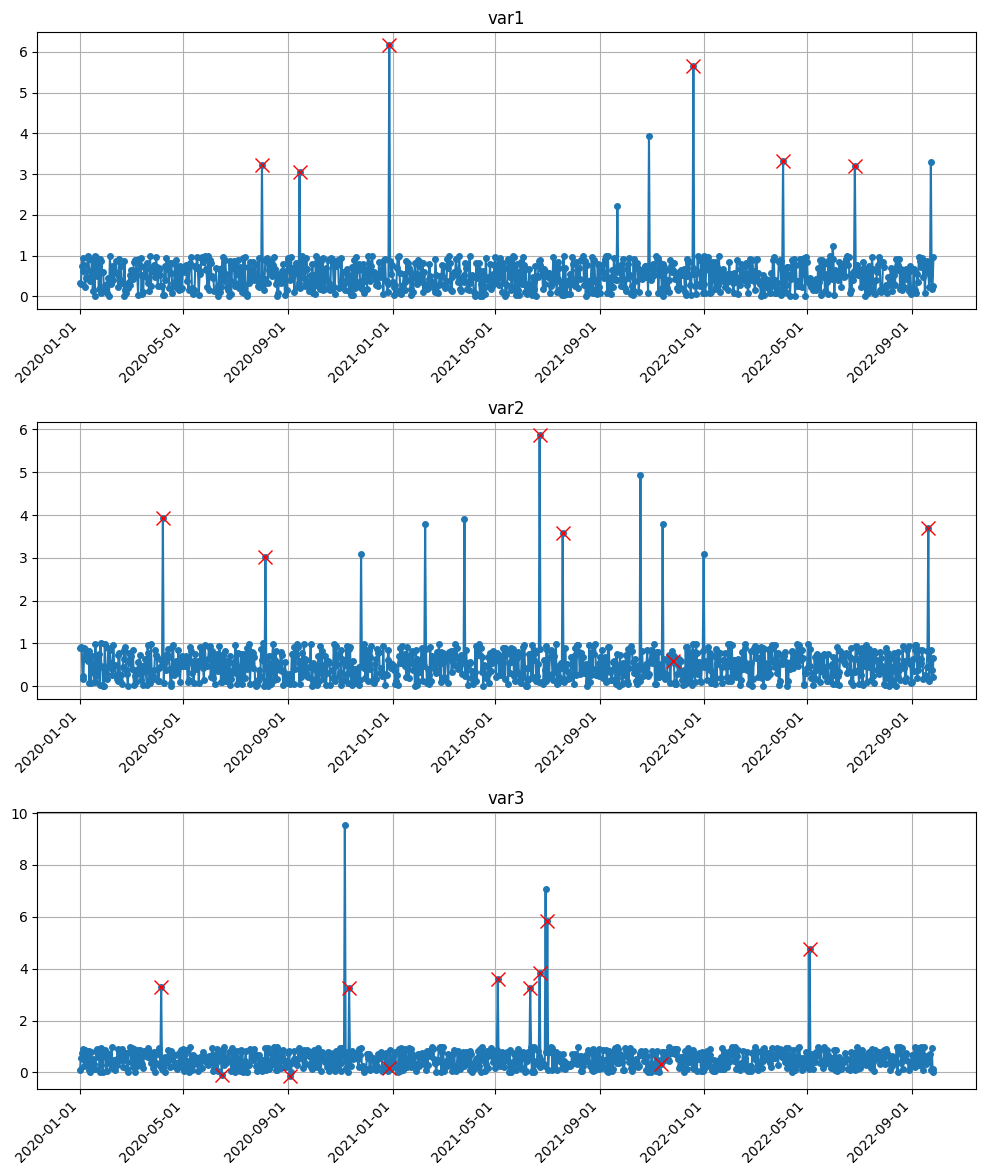

In [9]:
# plot final data with anomalies
plot_df(df_final)